In [1]:
import pandas as pd

try:
    df = pd.read_csv('recursos_humanos.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'recursos_humanos.csv' not found. Please ensure the file is in the correct directory or provide the full path.")
except Exception as e:
    print(f"An error occurred: {e}")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


(14999, 10)


## Cargue la base de datos en Python y asegúrese de re-codificar las variables categóricas de manera pertinente antes de iniciar su análisis (Sugerencia: Use “pd.get_dummies”) 

In [2]:
categorical_cols = ['sales', 'salary']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df.head())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


## Mediante un análisis exploratorio de datos determine si esta base de datos está equilibrada o no (de acuerdo a las categorías existentes). 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales_RandD            14999 non-null  bool   
 9   sales_accounting       14999 non-null  bool   
 10  sales_hr               14999 non-null  bool   
 11  sales_management       14999 non-null  bool   
 12  sales_marketing        14999 non-null  bool   
 13  sales_product_mng      14999 non-null  bool   
 14  sales_sales            14999 non-null  bool   
 15  sa

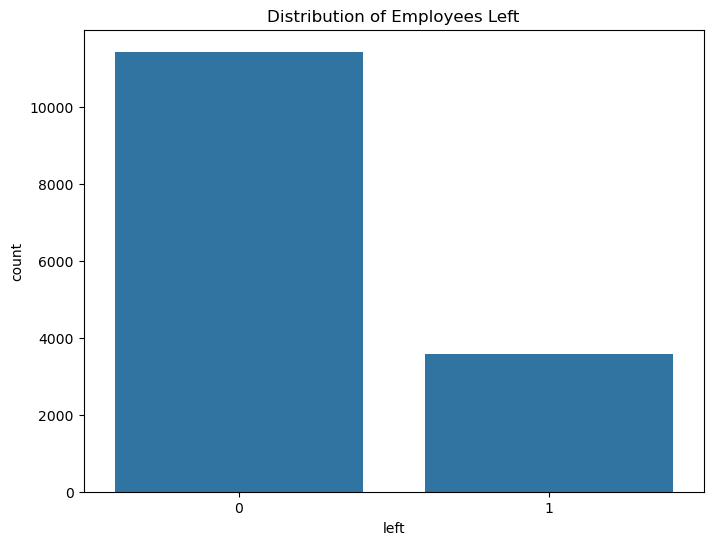


Percentage of employees who left: left
0    76.191746
1    23.808254
Name: proportion, dtype: float64

Descriptive Statistics:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


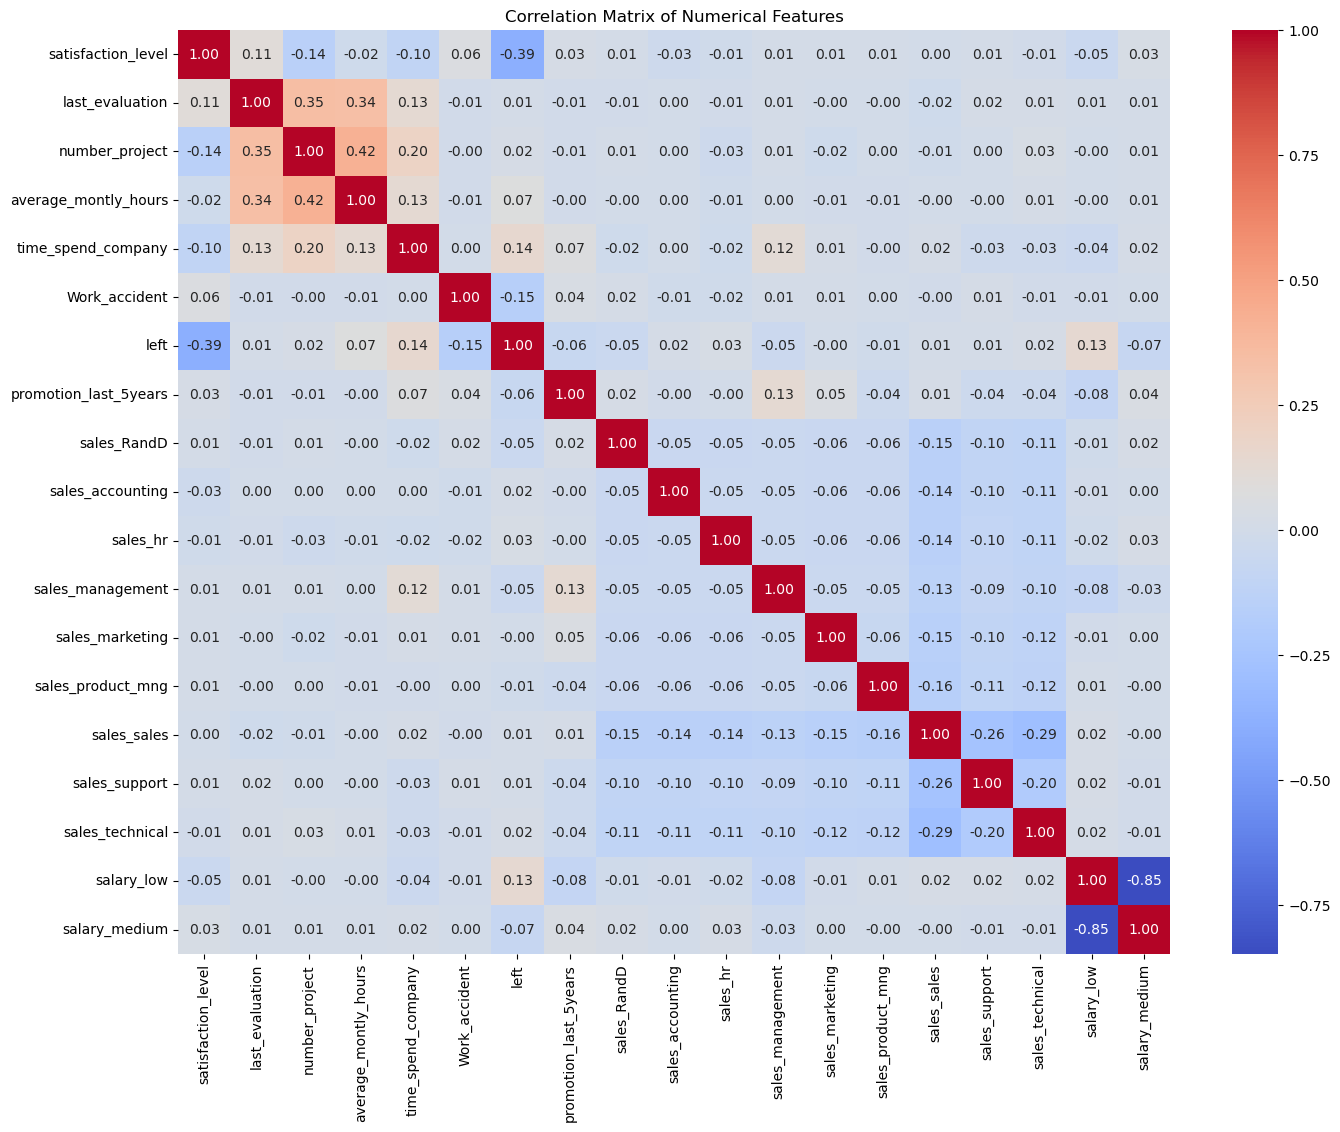


Correlation with 'left':
left                     1.000000
time_spend_company       0.144822
salary_low               0.134722
average_montly_hours     0.071287
sales_hr                 0.028249
number_project           0.023787
sales_technical          0.020076
sales_accounting         0.015201
sales_support            0.010700
sales_sales              0.009923
last_evaluation          0.006567
sales_marketing         -0.000859
sales_product_mng       -0.011029
sales_management        -0.046035
sales_RandD             -0.046596
promotion_last_5years   -0.061788
salary_medium           -0.068833
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

Shape of the DataFrame: (14999, 19)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Resumen de datos
print(df.info())

# 2. Distribución de variables objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='left', data=df)
plt.title('Distribution of Employees Left')
plt.show()

left_percentage = df['left'].value_counts(normalize=True) * 100
print(f"\nPercentage of employees who left: {left_percentage}")

# 3. Estadísticas descriptivas
print("\nDescriptive Statistics:")
display(df.describe())

# 4. Análisis de correlación
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 5. Centrarse en la correlación con la "izquierda"
print("\nCorrelation with 'left':")
print(correlation_matrix['left'].sort_values(ascending=False))

# 6. Formato de Datos
print(f"\nShape of the DataFrame: {df.shape}")

## Use el método de K Vecinos más cercanos para generar un modelo predictivo. Para dicho fin, determine el valor óptimo de K evaluando distintas alternativas:    k = 1, 2, ...., 20 Asegúrese de respaldar su recomendación de la k óptima en base a una tabla que compare en cada caso las diversas precisiones comentadas en esta lección. 

In [ ]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df.drop('left', axis=1)
y = df['left']

#  Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Imprimir formas de los conjuntos resultantes.
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (11999, 18)
X_test shape: (3000, 18)
y_train shape: (11999,)
y_test shape: (3000,)


In [6]:
# Entrene modelos K-Nearest Neighbors (KNN) con diferentes valores de k (k = 1, 2, ..., 20) utilizando los datos de entrenamiento (X_train, y_train).

from sklearn.neighbors import KNeighborsClassifier

models = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    models.append(knn)

# Evaluacion el modelo 

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = []
for k, model in enumerate(models, 1):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics.append([k, accuracy, precision, recall, f1])

df_metrics = pd.DataFrame(metrics, columns=['k', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
display(df_metrics)

# Determinar el k óptimo en función de las métricas (por ejemplo, priorizar la recuperación)
optimal_k = df_metrics.loc[df_metrics['Recall'].idxmax(), 'k']
print(f"\nValor k óptimo basado en la recuperación más alta: {optimal_k}")

,k,Accuracy,Precision,Recall,F1-Score
0,1,0.962000,0.895778,0.950980,0.922554
1,2,0.957667,0.921090,0.899160,0.909993
2,3,0.953000,0.871595,0.941176,0.905051
3,4,0.950000,0.893855,0.896359,0.895105
4,5,0.946667,0.861619,0.924370,0.891892
5,6,0.950333,0.884354,0.910364,0.897170
6,7,0.947000,0.859922,0.928571,0.892929
7,8,0.949333,0.872679,0.921569,0.896458
8,9,0.944667,0.851282,0.929972,0.888889
9,10,0.946333,0.864295,0.918768,0.890699



Valor k óptimo basado en la recuperación más alta: 1


## Elabore un mapa de calor para la matriz de confusión asociada al valor óptimo de k. Interprete verbalmente cada resultado mostrado en dicha matriz. 

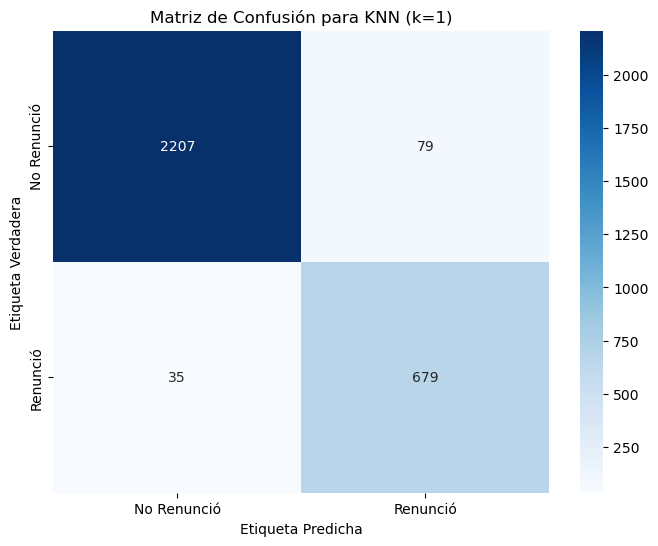

Verdaderos Negativos (TN): 2207
Falsos Positivos (FP): 79
Falsos Negativos (FN): 35
Verdaderos Positivos (TP): 679

Interpretación:
Verdaderos Negativos (TN): 2207 - Predicciones correctas de empleados que no renunciaron.
Falsos Positivos (FP): 79 - Predicciones incorrectas de que los empleados renunciarían, pero no lo hicieron. Esto podría llevar a esfuerzos de retención innecesarios.
Falsos Negativos (FN): 35 - Predicciones incorrectas de que los empleados no renunciarían, pero lo hicieron. Esto podría indicar un fallo en identificar y abordar problemas que llevan a la rotación de empleados.
Verdaderos Positivos (TP): 679 - Predicciones correctas de empleados que renunciaron. Esto destaca el éxito del modelo en predecir la rotación de empleados.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener el valor óptimo de k (asumiendo que optimal_k está definido)
optimal_k = int(optimal_k)

# Seleccionar el modelo correspondiente de la lista de modelos
optimal_model = models[optimal_k - 1]

# Predecir la variable objetivo para los datos de prueba
y_pred = optimal_model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Renunció', 'Renunció'],
            yticklabels=['No Renunció', 'Renunció'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title(f'Matriz de Confusión para KNN (k={optimal_k})')
plt.show()

# Interpretar la matriz de confusión
tn, fp, fn, tp = cm.ravel()

print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdaderos Positivos (TP): {tp}")

print("\nInterpretación:")
print(f"Verdaderos Negativos (TN): {tn} - Predicciones correctas de empleados que no renunciaron.")
print(f"Falsos Positivos (FP): {fp} - Predicciones incorrectas de que los empleados renunciarían, pero no lo hicieron. Esto podría llevar a esfuerzos de retención innecesarios.")
print(f"Falsos Negativos (FN): {fn} - Predicciones incorrectas de que los empleados no renunciarían, pero lo hicieron. Esto podría indicar un fallo en identificar y abordar problemas que llevan a la rotación de empleados.")
print(f"Verdaderos Positivos (TP): {tp} - Predicciones correctas de empleados que renunciaron. Esto destaca el éxito del modelo en predecir la rotación de empleados.")

## Obtenga e interprete la gráfica de la curva ROC para el valor óptimo de k.  

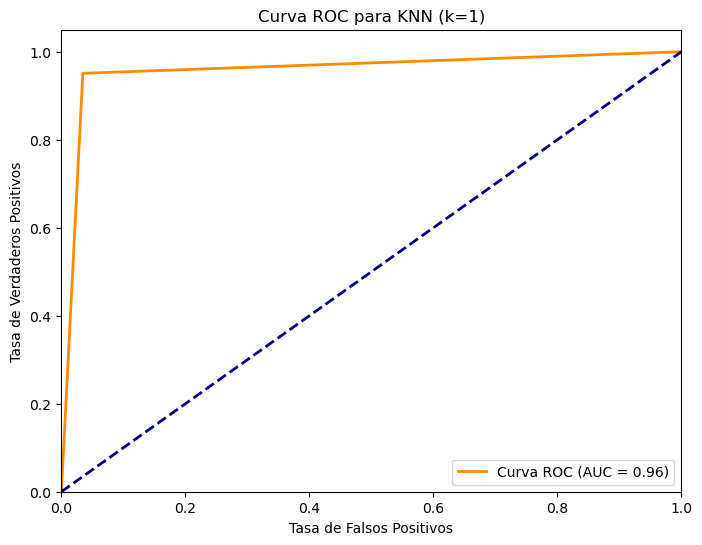

Puntaje AUC: 0.96

Interpretación:
El puntaje AUC de 0.96 indica la capacidad del modelo para distinguir entre empleados que renunciaron y los que no lo hicieron. Un AUC de 1 representa un clasificador perfecto, mientras que un AUC de 0.5 sugiere un rendimiento aleatorio. La curva ROC representa visualmente el equilibrio entre sensibilidad (tasa de verdaderos positivos) y especificidad (1 - tasa de falsos positivos) en varios umbrales de clasificación. Una curva más cercana a la esquina superior izquierda del gráfico indica un mejor rendimiento. En este caso, el puntaje AUC y la curva sugieren un rendimiento razonablemente bueno del modelo.


In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Asumiendo que optimal_k y optimal_model están definidos en pasos anteriores
optimal_k = int(optimal_k)
optimal_model = models[optimal_k - 1]

# Predecir probabilidades para la clase positiva (left=1)
y_prob = optimal_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el puntaje AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title(f'Curva ROC para KNN (k={optimal_k})')
plt.legend(loc='lower right')
plt.show()

print(f"Puntaje AUC: {roc_auc:.2f}")
print("\nInterpretación:")
print(f"El puntaje AUC de {roc_auc:.2f} indica la capacidad del modelo para distinguir entre empleados que renunciaron y los que no lo hicieron. Un AUC de 1 representa un clasificador perfecto, mientras que un AUC de 0.5 sugiere un rendimiento aleatorio. La curva ROC representa visualmente el equilibrio entre sensibilidad (tasa de verdaderos positivos) y especificidad (1 - tasa de falsos positivos) en varios umbrales de clasificación. Una curva más cercana a la esquina superior izquierda del gráfico indica un mejor rendimiento. En este caso, el puntaje AUC y la curva sugieren un rendimiento razonablemente bueno del modelo.")